# Tasks
***

### Task 1
***

#### Problem Statement

*Write a Python function called **counts** that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values. So, the input ```['A', 'A', 'B', 'C', 'A']``` should have output ```{'A': 3, 'B': 1, 'C': 1}```. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include a description with references of your algorithm in the notebook.*

#### Solution

Both lists and dictionaries are mutable data structures containing one or more data points, and can be nested inside a list or a dictionary. They do not have to be homogenous, so they can contain number, string and Boolean values. The primary difference between them is that lists are ordered and dictionaries are not. For example, ```list[0]``` refers to the first element in the list while ```dict[0]``` refers to the key value and returns the corresponding value.<SUP>1</SUP> <SUP>2</SUP>

The first step is to create an empty list and dictionary. A list of special characters to exclude from a string is also created. To maintain consistency, a *for* loop is used to convert any string items to uppercase using the ```upper()``` method.<SUP>3</SUP> <SUP>4</SUP> Once converted, the items are then appended to the new list after special characters are removed using the ```replace()``` function.<SUP>5</SUP> The dictionary is then populated by using a *for* loop to iterate over each item in the new list.<SUP>6</SUP> When iterating over each item, the ```isinstance()``` function is used to determine if the item is a list or a tuple.<SUP>7</SUP> If the item is a list or a tuple, a *for* loop is used to iterate over each item. If the item is not in the dictionary, the value is incremented. If otherwise, the value is set to 1.

One limitation of the ```count()``` function is in relation to counting Boolean values. ```True``` is a built-in enumeration with a value of 1. Thus, the hash function sees ```True``` as ```1``` and vice versa depending on which one appears in the list first.<SUP>8</SUP>

In [81]:
# Create a list
lst = ['A', 'A', 'B', 'C', 'A']

In [82]:
# Define the function
def counts(lst):
    # Create an empty list and dictionary
    new_lst, dict = [], {}
    # Creat a list of special characters to exclude
    bad_chars = [".", ",", "_", "\"", "'", "-", "+", "=", "@", "$", "?", "~", "#", "%", "|", "\\", "/", "!", "*", ":", ";", "<", ">", "&", "^"]
    
    # Loop through each item in the list
    for i in lst:
        # Check if i is a string
        if isinstance(i, str):
            # Convert i to uppercase
            i = i.upper()
            # Remove special characters
            for char in i:
                if char in bad_chars:
                    i = i.replace(char, "")
            # Append the string to the new list
            new_lst.append(i)
        else:
            # Append i to list
            new_lst.append(i)
            
    # Loop through each item in the list
    for k in new_lst:
        # Check if k is a list
        if isinstance(k, (list, tuple)):
            # Loop through each item in the list or tuple
            for x in k:
                # Increment value if already in the dictionary
                if x in dict:
                    dict[x] += 1
                # Set the value as 1 if not in the dictionary
                else:
                    dict[x] = 1        
        # Increment value if already in the dictionary
        elif k in dict:
            dict[k] += 1
        # Set the value as 1 if not in the dictionary
        else:
            dict[k] = 1
    
    # Return the dictionary
    return dict

In [83]:
# Call the function
counts(lst)

{'A': 3, 'B': 1, 'C': 1}

#### References

1. Real Python, *Dictionaries in Python* [online] Available at: https://realpython.com/python-dicts/

2. Python, *Data structures* [online] Available at: https://docs.python.org/3/tutorial/datastructures.html

3. GeeksforGeeks, *Check if a variable is string* [online] Available at: https://www.geeksforgeeks.org/python-check-if-a-variable-is-string/

4. w3resource, *Convert a string to all uppercase* [online] Available at: https://www.w3resource.com/python-exercises/string/python-data-type-string-exercise-21.php

5. w3schools, *Python String replace() Method* [online] Available at: https://www.w3schools.com/python/ref_string_replace.asp

6. Stack Overflow, *Using a dictionary to count the items in a list* [online] Available at: https://stackoverflow.com/questions/3496518/using-a-dictionary-to-count-the-items-in-a-list

7. PYnative, *Python isinstance() explained with examples* [online] Available at: https://pynative.com/python-isinstance-explained-with-examples/

8. Stack Overflow, *Boolean keys with other data types in dictionary* [online] Available at: https://stackoverflow.com/questions/44185741/boolean-keys-with-other-data-types-in-dictionary

<br>

### Task 2
***

#### Problem Statement

*Write a Python function called **dicerolls** that simulates rolling dice. Your function should take two parameters: the number of dice k and the number of times to roll the dice n. The function should simulate randomly rolling k dice n times, keeping track of each total face value. It should then return a dictionary with the number of times each possible total face value occurred. So, calling the function as diceroll(k=2, n=1000) should return a dictionary like:*

```{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}```

*You can use any module from the Python standard library you wish and you should include a description with references of your algorithm in the notebook.*

#### Solution

The first step is to import any required libraries. The NumPy library is required to generate pseudorandom numbers using the ```numpy.random``` package.

In [ ]:
# Import the NumPy library
import numpy as np

The ```default_rng()``` function below constructs a new Generator. It takes one parameter, which creates a seed to initialise the BitGenerator. If no seed is passed, then fresh, unpredictable entropy will be pulled from the OS.<SUP>1</SUP> The ```integers()``` function is used to assign a random integer to the two variables, which are to be used as parameters by the ```dicerolls()``` function. It returns random integers from *low* (inclusive) to *high* (exclusive), or if ```endpoint=True```, *low* (inclusive) to *high* (inclusive).<SUP>2</SUP>

In [28]:
# Construct a new Generator
rng = np.random.default_rng()
# Assign a random integer to the "k" and "n" variables
k, n = rng.integers(1, 10, endpoint=True), rng.integers(1, 1000, endpoint=True)
# Print the number of dice and number of rolls
print("Number of dice: ", k, "\nNumber of rolls: ", n)

Number of dice:  8 
Number of rolls:  916


In defining the function, an empty dictionary called ```face_vals``` is created, which will store the number of times each possible total face value occurred. As the range of face values is dependent on the number of dice, the value of ```k``` is stored as the lowest possible value in variable ```range_low``` (e.g. if three dice are thrown, then three is the lowest possible face value). As there are six numbers on a dice, the highest possible value would be 6 multiplied by the number of dice thrown. This value is stored in the variable ```range_high```.

The next step is to loop through the number of dice to be rolled using the ```range()``` function. Within this loop, another *for* loop is used to iterate through each roll. The ```integers()``` function is used to generate a random number between the lowest and highest possible values and store it in variable ```x```. As ```endpoint=True```, the value of ```range_high``` is inclusive. An *if* and *else* statement is used to check whether the face value is already in the dictionary. If it is, the value is incremented. Otherwise, its value is set to 1.

Once the dictionary has been populated, the ```sorted()``` function is used to sort the dictionary by key. The ```face_vals.items()``` method returns a list of tuples comprising the keys and their corresponding value.<SUP>3</SUP> The ```lambda``` function returns the key for a specific item tuple.<SUP>4</SUP>

In [26]:
# Define the function
def dicerolls(k, n):
    # Create an empty dictionary
    face_vals = {}
    # Set the value of "k" as the lowest possible face value
    range_low = k
    # Set the value of "k" multiplied by 6 as the highest possible face value
    range_high = k*6
    # Loop through each dice
    for dice in range(k):
        # Loop through each roll
        for roll in range(n):
            # Generate a random integer and store it in a variable
            x = rng.integers(range_low, range_high, endpoint=True)
            # Increment value if already in the dictionary
            if x in face_vals:
                face_vals[x] += 1
            # Set the value as 1 if not in the dictionary    
            else:
                face_vals[x] = 1   
    
    # Return a sorted dictionary
    return dict(sorted(face_vals.items(), key=lambda x: x[0]))

When calling the ```dicerolls()``` function, it returns a sorted dictionary.

In [27]:
# Call the function
dicerolls(k, n)

{2: 10,
 3: 17,
 4: 22,
 5: 13,
 6: 25,
 7: 19,
 8: 15,
 9: 29,
 10: 17,
 11: 15,
 12: 18}

#### References

1. NumPy, *Generator* [online] Available at: https://numpy.org/doc/stable/reference/random/generator.html

2. Numpy, *numpy.random.Generator.integers* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html

3. w3schools, *Python Dictionary items() Method* [online] Available at: https://www.w3schools.com/python/ref_dictionary_items.asp

4. JournalDev, *Sorting a dictionary* [online] Available at: https://www.journaldev.com/38407/sort-a-dictionary-in-python

<br>

### Task 3
***

#### Problem Statement

*The ```numpy.random.binomial``` function can be used to simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a coin is flipped many times then the number of heads is well approximated by a bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively low, and the chances of getting any other number of heads decreases as you move away from 50 in either direction towards 0 or 100. Write some python code that simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track of the number of heads in each of the 1,000 simulations. Select an appropriate plot to depict the resulting list of 1,000 numbers, showing that it roughly follows a bell-shaped curve. You should explain your work in a Markdown cell above the code.*

#### Solution

The first step is to import the required libraries.   

In [2]:
# Import the required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The ```default_rng()``` function below constructs a new Generator. It takes one parameter, which creates a seed to initialise the BitGenerator. If no seed is passed, then fresh, unpredictable entropy will be pulled from the OS.<SUP>1</SUP>

In [3]:
# Construct a new Generator
rng = np.random.default_rng()

A function is defined to simulate flipping a coin 100 times. A variable is created to keep track of the number of "head" results and is initially set to 0. The ```numpy.random.binomial()``` function draws samples from a binomial distribution. It takes two parameters: *n* trials and *p* probability of success where *n* is an integer $>= 0$ and *p* is in the interval [0,1].<SUP>2</SUP> In this case, ```n= 1``` and ```p= 0.5``` as there is a constant 50% chance of one flip landing on heads. The trials are independent, meaning that getting heads on one trial does not affect whether the result is heads on other trials.<SUP>3</SUP> If that is the case, the ```heads``` variable is incremented. The function then returns the final count.    

In [4]:
# Define a function that flips a coin 100 times
def flips_100():
    # Create a variable to keep track of the number of heads
    heads = 0
    # Loop through 100 flips
    for i in range(100):
        # Return a value from 1 trial with 50% probability
        coin_flip = rng.binomial(1, 0.5)
        # Increment the count if the roll is equal to 1 (i.e. heads)
        if coin_flip == 1:
            heads += 1
    # Return the final count
    return heads

The next step is to run this function 1000 times. An empty list is first created. This will be then populated by using a *for* loop to run the ```flips_100()``` function 100 times and append each result to the list.

In [5]:
# Create an empty list
head_count = []
# Run the defined function 1000 times
for i in range(1000):
    x = flips_100()
    # Append the result to the list
    head_count.append(x)    

The code below prints out all 1000 results.

In [6]:
# Print the populated list
print(head_count)

[32, 59, 50, 58, 48, 52, 50, 51, 60, 47, 52, 52, 56, 53, 44, 46, 55, 52, 52, 49, 57, 50, 50, 44, 46, 47, 58, 58, 46, 51, 50, 46, 45, 62, 49, 45, 54, 56, 49, 55, 52, 47, 52, 58, 56, 45, 50, 58, 48, 55, 54, 48, 41, 55, 47, 51, 55, 57, 47, 57, 50, 50, 52, 46, 46, 51, 49, 49, 52, 49, 42, 54, 54, 46, 50, 48, 48, 48, 53, 58, 49, 52, 52, 53, 51, 56, 48, 47, 60, 49, 55, 46, 51, 48, 55, 51, 52, 56, 58, 54, 50, 52, 43, 58, 50, 42, 44, 54, 49, 52, 51, 57, 49, 48, 54, 51, 49, 50, 44, 44, 49, 48, 50, 58, 58, 45, 41, 52, 50, 58, 38, 56, 51, 45, 49, 49, 51, 51, 52, 49, 50, 57, 55, 48, 48, 58, 53, 51, 52, 51, 50, 53, 52, 47, 49, 64, 49, 53, 57, 50, 38, 45, 63, 56, 41, 44, 48, 53, 60, 48, 52, 46, 55, 54, 60, 45, 44, 52, 50, 46, 54, 56, 47, 52, 49, 49, 50, 47, 48, 49, 53, 50, 47, 52, 54, 43, 50, 69, 55, 43, 43, 63, 57, 41, 53, 52, 51, 51, 45, 55, 51, 59, 44, 42, 51, 49, 56, 51, 49, 56, 46, 55, 51, 51, 40, 39, 53, 48, 50, 50, 46, 51, 62, 52, 51, 52, 51, 51, 50, 49, 52, 60, 47, 53, 49, 51, 47, 44, 46, 40,

The plot below illustrates the binomial distribution, with the mean indicated by a red line.<SUP>4</SUP> This distribution is a common discrete distribution, as opposed to a continuous distribution, such as the normal distribution. This is because the binomial distribution only counts two states (i.e. success and failure).<SUP>5</SUP> The plot clearly shows that if a coin is flipped many times then the number of heads is well approximated by a bell-shaped curve.

Text(0.5, 1.0, 'Binomial Distribution')

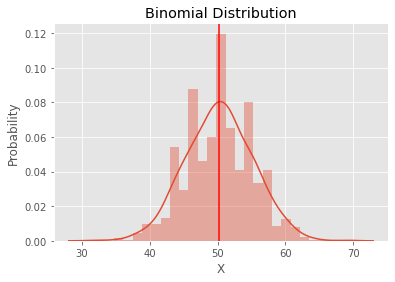

In [14]:
# Plot the list
sns.distplot(head_count)
# Apply plot style
plt.style.use("ggplot")
# Draw red line to show mean value
plt.axvline(np.mean(head_count), color="red")
# Add plot title and axes labels
plt.xlabel("X"), plt.ylabel("Probability"), plt.title("Binomial Distribution")

### References

1. NumPy, *Generator* [online] Available at: https://numpy.org/doc/stable/reference/random/generator.html

2. Numpy, *numpy.random.binomial* [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

3. Stat Trek, *Binomial Probability Distribution* [online] Available at: https://stattrek.com/probability-distributions/binomial.aspx

4. Stack Overflow, *Drawing average line in histogram (matplotlib)* [online] Available at: https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib 

5. Investopedia, *Binomial Distribution* [online] Available at: https://www.investopedia.com/terms/b/binomialdistribution.asp

<br>

### Task 4
***

#### Problem Statement

*Simpson’s paradox is a well-known statistical paradox where a trend evident in a number of groups reverses when the groups are combined into one big data set. Use numpy to create four data sets, each with an ```x``` array and a corresponding ```y``` array, to demonstrate Simpson’s paradox. You might create your ```x``` arrays using ```numpy.linspace``` and create the ```y``` array for each ```x``` using notation like ```y = a * x + b``` where you choose the ```a``` and ```b``` for each ```x```, ```y``` pair to demonstrate the paradox. You might see the Wikipedia page for Simpson’s paradox for inspiration.*

#### Solution

Simpson's paradox is a phenomenon in probability and statistics in which a trend appears in several different groups of data but disappears or reverses when these groups are aggregated.<SUP>1</SUP> <SUP>2</SUP> This is demonstrated below using four individual datasets. The first step is to import any required libraries.

In [71]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

Values are created for the *a* and *b* values of each data set. The ```linspace()``` function is then used to generate 30 linearly spaced values which will be used as the *x* values in each data set.<SUP>3</SUP> To generate the *y* values, an equation is applied as well as the ```random.normal()``` function to include some noise. The ```polyfit()``` function fits a polynomial (i.e line of best fit) of degree 1 to points *(x, y)* for each data set.<SUP>4</SUP> The resulting plot illustrates a positive correlation for each of the individual data sets.      

(Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y'),
 Text(0.5, 1.0, 'Best-fit lines for each individual data set'))

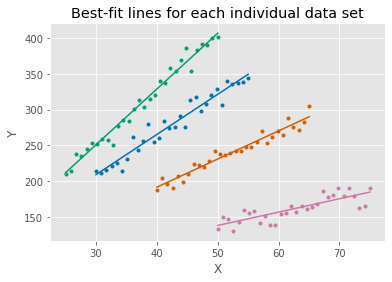

In [75]:
# Create the a, b and x values for each data set
a1, b1, x1 = 8, 10, np.linspace(25, 50, 30)
a2, b2, x2 = 6, 20, np.linspace(30, 55, 30) 
a3, b3, x3 = 4, 30, np.linspace(40, 65, 30)
a4, b4, x4 = 2, 40, np.linspace(50, 75, 30)

# Create the y values based on the a, b and x values for each data set
y1 = a1 * x1 + b1 + np.random.normal(0, 10, len(x1))
y2 = a2 * x2 + b2 + np.random.normal(0, 10, len(x2))
y3 = a3 * x3 + b3 + np.random.normal(0, 10, len(x3))
y4 = a4 * x4 + b4 + np.random.normal(0, 10, len(x4))

# Plot the data sets
plt.plot(x1, y1, ".", color="#009E73")
plt.plot(x2, y2, ".", color="#0072B2")
plt.plot(x3, y3, ".", color="#D55E00")
plt.plot(x4, y4, ".", color="#CC79A7")

# Fit a polynomial to each data set
coeffs_1 = np.polyfit(x1, y1, 1)
coeffs_2 = np.polyfit(x2, y2, 1)
coeffs_3 = np.polyfit(x3, y3, 1)
coeffs_4 = np.polyfit(x4, y4, 1)

# Plot the best-fit line
plt.plot(x1, coeffs_1[0] * x1 + coeffs_1[1], "-", color="#009E73")
plt.plot(x2, coeffs_2[0] * x2 + coeffs_2[1], "-", color="#0072B2")
plt.plot(x3, coeffs_3[0] * x3 + coeffs_3[1], "-", color="#D55E00")
plt.plot(x4, coeffs_4[0] * x4 + coeffs_4[1], "-", color="#CC79A7")

# Apply a plot style
plt.style.use("ggplot")
# Add plot title and axes labels
plt.xlabel("X"), plt.ylabel("Y"), plt.title("Best-fit lines for each individual data set")

To demonstrate Simpson's paradox, these four data sets are combined using the ```concatenate()``` function. A plot of the combined data set is created and a line of best fit is generated.<SUP>5</SUP> The call to ```poly1d()``` is an alternative to writing ```a * x + b```.<SUP>6</SUP> The resulting plot shows how a correlation that points in one direction in stratified groups sometimes becomes a correlation (negative in this instance) in the opposite direction when aggregated.

(Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y'),
 Text(0.5, 1.0, 'Best-fit line for combined data set'))

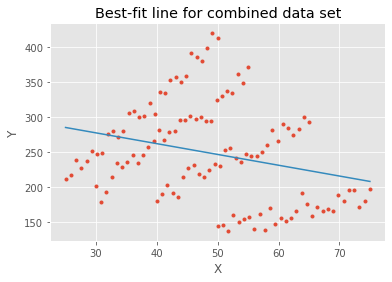

In [74]:
# Combine the x and y values of each data set into one data set
x_combined = np.concatenate([x1, x2, x3, x4])
y_combined = np.concatenate([y1, y2, y3, y4])

# Plot the combined data set
plt.plot(x_combined, y_combined, marker=".", linestyle="None")
# Fit a polynomial
plt.plot(np.unique(x_combined), np.poly1d(np.polyfit(x_combined, y_combined, 1))(np.unique(x_combined)))

# Apply plot style
plt.style.use("ggplot")
# Add plot title and axes labels
plt.xlabel("X"), plt.ylabel("Y"), plt.title("Best-fit line for combined data set")

### References

1. Wikipedia, *Simpson's paradox* [online] Available at: https://en.wikipedia.org/wiki/Simpson%27s_paradox

2. Towards Data Science, *Simpson's Paradox: How to Prove Opposite Arguments with the Same Data* [online] Available at: https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9

3. NumPy, *numpy.linspace* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

4. NumPy, *numpy.polyfit* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

5. Stack Overflow, *Code for best fit straight line of a scatter plot in python* [online] Available at: https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python

6. Stack Overflow, *How to overplot a line on a scatter plot in python?* [online] Available at: https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python/19069001#19069001